# Introduction to Python for scientific research
*Bart van Stratum, Max Planck Institute for Meteorology, Hamburg*

AES Python workshop, 7-8 October 2015, MPI-M

This notebook is available at:  
https://github.com/julietbravo/python_workshop_AES/blob/master/Python_introduction.ipynb

# 1 Introduction
### The origin of Python

> *"Over six years ago, in December 1989, I was looking for a "hobby" programming project that would keep me occupied during the week around Christmas...”* — Guido van Rossum

### Python: general-purpose, high-level programming language 
* General purpose: more than a plotting language!  
􏰀  * One of the key languages at e.g. Google, CERN, NASA, MPI-M(?)   
* High-level: focus on code readability, short syntax  
* Interpreted language

### Why use Python for your research?
*(my personal opinion, and in random order)*

1. Easy to learn, and read / write code
2. It's free and open source (unlike Matlab, IDL, ...)
3. Well documented, easy to get support
4. Capable of handling your entire scientific workflow

> *"Python enables users to do more and better science"* 

*Johnny Wei-Bing Lin, 2012: Why Python Is the Next Wave in Earth Sciences Computing. Bull. Amer. Meteor. Soc., 93, 1823–1824.*

### Python 2 or Python 3
Extensive discussion at https://wiki.python.org/moin/Python2orPython3
> Python 2.x is legacy, Python 3.x is the present and future

* Python 3: released in 2008, actively developed version, currently at v3.5
* Python 2: last release in 2010, maintained but not actively developed
  
Python 3 = backwards-incompatible release! Some Python 3 features backported to 2.7

#### My recommendation: if you just get started, use Python 3

# 2 Getting started with Python
## 2.1 Install or load Python
Python core is by default installed on (almost?) all Linux distributions and OS X. Useful extensions (discussed later) mostly available through package managers  

##### On MPI systems (desktops, Thunder, Mistral): 
* `module load python` (Python 2.7)
* `module load python3/3.4.2` (Python 3.4, not available on Mistral)

##### OS X using Macports:
* `python34 py34-ipython py34-numpy py34-matplotlib py34-netcdf4` (`py34-matplotlib-basemap`) packages

##### Linux: 
* package names similar to OS X / Macports

##### Windows (untested):
* Enthought Canopy (https://www.enthought.com)  
  * Free version available which excludes... support for plotting maps

## 2.2 Running Python code

Two options:
1. Write code in a script, call Python interpreter (`$python script.py`)
2. Run code in interactive Python shell (IPython), great for development and debugging: 
  * Allows you to run scripts, interactively type code, access variables, etc.

Example IPython (start from command line with `ipython`):

In [2]:
!cat scripts/hello_world.py

print('hello world!')
pi = 3.1415


In [1]:
run scripts/hello_world.py

hello world!


Possible to directly access/manipulate variables in the interactive shell:

In [2]:
3*pi

9.4245

## 2.3 Python extensions (packages)
Python standard library provides basic functionality, often useful (or necessary) to extend for our type of work.

Useful examples:
1. NumPy: multi-dimensional arrays + functions to manipulate them (*Chiel's talk*)
2. matplotlib (pylab): plotting (line, scatter, histogram, contour, ...)
3. Basemap: plotting of maps (*Sebastian's talk*)
4. netCDF4/PyNIO: reading / writing netCDF files

Many more: PyNGL (Python interface to NCL), Pandas (Python data analysis library), ..

#### How to use the packages: import statement

In [3]:
import numpy   # import using default name
numpy.zeros(2), numpy.ones(2)

(array([ 0.,  0.]), array([ 1.,  1.]))

In [4]:
import numpy as np   # abbreviated name
np.zeros(2), np.ones(2)

(array([ 0.,  0.]), array([ 1.,  1.]))

In [5]:
reset -f 

In [6]:
from numpy import zeros   # specific import
zeros(2)
#ones(2) # won't work

array([ 0.,  0.])

In [7]:
from numpy import *   # import everything
zeros(2), ones(2)

(array([ 0.,  0.]), array([ 1.,  1.]))

`import *` can be tricky: 

In [8]:
pi = 0
from numpy import *
pi

3.141592653589793

"`import package`" or "`import package as abc`" most often used: always clear where functions/routines/constants come from. 

In [9]:
reset -f 

# 3 Python basics
## 3.1 Variables

Python uses *duck typing*:
> *"If a bird looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck."*

In [10]:
var_1 = 1
var_2 = 1.
var_3 = "1"

type(var_1), type(var_2), type(var_3)

(int, float, str)

If necessary, you can cast variables to another type:

In [11]:
var_1 = float(1)
var_2 = str(1.)
var_3 = int("1")

type(var_1), type(var_2), type(var_3)

(float, str, int)

### Strings
Most simple construction: put something (anything) in between quotation marks:

In [12]:
s1 = 'Im a string!'
s2 = "me too!"

Can be combined with the formating of numbers/strings:

In [13]:
import numpy as np

a = 'pi = {0:8.4f}'.format(np.pi)
a

'pi =   3.1416'

Examples:

In [14]:
a = '{}'.format(np.pi)               # minimal
b = '{} {}'.format(np.pi, np.e)      # multiple numbers
c = '{1} {0}'.format(np.pi, np.e)    # indicate order
d = '{0:6.2f}'.format(np.pi)         # specify width / decimals
e = '{0:<6.2f}'.format(np.pi)        # alignment left
f = '{0:^6.2f}'.format(np.pi)        # alignment center

a, b, c, d, e, f

('3.141592653589793',
 '3.141592653589793 2.718281828459045',
 '2.718281828459045 3.141592653589793',
 '  3.14',
 '3.14  ',
 ' 3.14 ')

Slicing of string is possible:

In [15]:
a = "I'm a string!"
a[0], a[0:5], a[:]

('I', "I'm a", "I'm a string!")

*Note that indexing starts at zero, slicing exludes last element*

(Nearly) infinite number of possibilities, see e.g. https://pyformat.info for examples 

## 3.2 Data structures

### 3.2.1 Lists: constructor [a,b,c]

In [16]:
time = [0,1,2,3,4,5,6,7,8,9]

Values accessible based on index or (strided) slice:  

In [17]:
time[0], time[1:4], time[0:6:2]

(0, [1, 2, 3], [0, 2, 4])

Lists can easily be manipulated:

In [18]:
time.append(10) # Append a value
time.remove(0)  # Remove first occurance of value
time.pop(5)     # Remove an element
time

[1, 2, 3, 4, 5, 7, 8, 9, 10]

### 3.2.2 Tuples: constructor (a,b,c) 
Like a list, but not mutable

In [19]:
stations = ('hamburg','cabauw','karlsruhe')
stations

('hamburg', 'cabauw', 'karlsruhe')

After defining them, unable to change, append or remove items

### 3.2.3 Dictionaries: constructor {'a':0, 'b':1}
Combination of keys and values, values accessible by keys:

In [20]:
data = {'T': 290, 'q': 10e-3, 'u': -2}
data['T'], data['u']

(290, -2)

Are mutable:

In [21]:
data['T'] = 300  # Change element
data['v'] = 3    # Add element
data.pop('u')    # Remove element (or del data['u'])
data

{'T': 300, 'q': 0.01, 'v': 3}

### 3.2.4 Numpy arrays

In [22]:
import numpy as np
a1 = np.zeros(4)  # Array initialized with zeros
a2 = np.ones(4)   #   "         "      "   ones
a3 = np.empty(4)  # Uninitialized array

Multi-dimensional arrays:

In [23]:
a4 = np.zeros((2,2,2))
a5 = np.zeros((2,2,2), dtype=np.int)

Advantage over lists: easier to create multi-dimensional arrays, efficient methods of manipulating/analyzing them.  

More information on Numpy arrays and how to efficiently use them in Chiel's talk

## 3.3 Loops

Two options: `for:` and `while:`

In [24]:
for i in range(2): # equivalent to range(0,2)
    print(i)

0
1


In [25]:
a = [1,2,3]
for value in a:
    print(value)

1
2
3


In [26]:
i = 10
while i > 1:
    i /= 2   # i = i / 2

Indentation determines body of loop:

In [27]:
for i in range(2):
    for j in range(2):
        for k in range(2):
            pass # i.e. do nothing
        # part of j-loop

Python is not very strict on indentation:

In [28]:
for i in range(1):
 pass
for i in range(1):
                   pass
for i in range(1):
         pass

for i in range(1):
             for j in range(1):
              for k in range(1):
                                 pass

> *"How To Write Unmaintainable Code and Ensure a job for life ;-)"*
https://www.thc.org/root/phun/unmaintain.html

Python style guide (https://www.python.org/dev/peps/pep-0008/) recommends using 4 spaces indentation.

## 3.4 Functions

Often useful to wrap code in functions to prevent having duplicate code:

In [29]:
cp = 1004.
Rd = 287.
def exner(p, p0):
    # intermediate calculations if necessary
    return (p/p0)**(Rd/cp)

exner(90000, 1e5)  

0.970331031603382

It is possible to specify default arguments:

In [30]:
def exner(p, p0=1e5):
    return (p/p0)**(Rd/cp)

exner(90000), exner(90000,101300)

(0.970331031603382, 0.9667549928755136)

Easy to operate on arrays:

In [31]:
import numpy as np

def exner(p, p0=1e5):
    return (p/p0)**(Rd/cp)

p = np.linspace(70000, 101300, 10)
exner(p)

array([ 0.90306759,  0.91567175,  0.92785679,  0.93965467,  0.95109368,
        0.96219894,  0.97299292,  0.98349577,  0.99372566,  1.00369901])

## 3.5 Cleaning up

No deallocation needed in Python: reference counting and garbage collecting release memory when there are no more references to it, or at the end of the execution

In [32]:
import numpy as np

f1 = np.arange(512**3)  # 1 GB memory allocated

At end of script, or when reference to data is lost, memory is released:

In [54]:
f1 = None # or 'del f1': 1 GB released

# 4 Code examples
## 4.1 Input & output
### 4.1.1 Text files
Some dummy data to play with:

In [35]:
import numpy as np

z  = np.linspace(0,100,6)    # Height [m]
th = 290 + 0.006*z           # Potential temperature [K]
qt = np.zeros_like(z)        # Specific humidity [kg/kg]

# Set some elements to an invalid (e.g. missing) value:
th[-1] = -9999
qt[-2] = -9999

z, th, qt

(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 array([  290.  ,   290.12,   290.24,   290.36,   290.48, -9999.  ]),
 array([    0.,     0.,     0.,     0., -9999.,     0.]))

`open()` can be used to both read from, and write to files (text and binary): 

In [36]:
f = open('data/data.txt', 'w')  # w=write, r=read, ..
f.write('{0:^15s} {1:^15s} {2:^15s}\n'.format('z','theta [K]','q [kg/kg]'))
for k in range(z.size):
    f.write('{0:+1.8E} {1:+1.8E} {2:+1.8E}\n'.format(z[k], th[k], qt[k]))
f.close()

In [37]:
!cat data/data.txt

       z           theta [K]       q [kg/kg]   
+0.00000000E+00 +2.90000000E+02 +0.00000000E+00
+2.00000000E+01 +2.90120000E+02 +0.00000000E+00
+4.00000000E+01 +2.90240000E+02 +0.00000000E+00
+6.00000000E+01 +2.90360000E+02 +0.00000000E+00
+8.00000000E+01 +2.90480000E+02 -9.99900000E+03
+1.00000000E+02 -9.99900000E+03 +0.00000000E+00


We can either do something similar to read it back in memory, or cheat and use Numpy:

In [38]:
f  = np.loadtxt('data/data.txt', skiprows=1) # returns 2D array [rows, columns]
z  = f[:,0]
th = f[:,1]
qt = f[:,2]

th

array([  290.  ,   290.12,   290.24,   290.36,   290.48, -9999.  ])

### Intermezzo: dealing with bad/missing data

Our data still has some missing values (-9999):

Numpy (`np.ma` module) has the possibility to create masked arrays, either manually:

In [39]:
a = np.ma.zeros(5)
a[3] = np.ma.masked
a

masked_array(data = [0.0 0.0 0.0 -- 0.0],
             mask = [False False False  True False],
       fill_value = 1e+20)

Or based on existing data + masking criteria:

In [40]:
th_m = np.ma.masked_equal(th, -9999) 
qt_m = np.ma.masked_equal(qt, -9999)
th_m

masked_array(data = [290.0 290.12 290.24 290.36 290.48 --],
             mask = [False False False False False  True],
       fill_value = -9999.0)

Many similar functions available (`masked_where()`, `masked_greater()`, et cetera).

Masked values are exluded from statistics, figures, etc.:

In [41]:
th.mean(), th_m.mean()

(-1424.6333333333332, 290.24000000000001)

Masks are propagated:

In [42]:
th_m + qt_m

masked_array(data = [290.0 290.12 290.24 290.36 -- --],
             mask = [False False False False  True  True],
       fill_value = -9999.0)

### 4.1.2 NetCDF
There are several NetCDF packages available, I'll only demonstrate netCDF4

Writing a NetCDF file with data, dimensions, attributes:

In [43]:
import netCDF4 as nc4

# Create dataset, dimensions and set some global attributes:
nc = nc4.Dataset('data/data.nc', 'w')
nc.createDimension('z', z.size)
nc.setncattr('source', 'AES Python workshop')

# Create variables and set attributes:
nc_z = nc.createVariable('z', 'f8', 'z')                                        
nc_z.setncattr('units', 'm')
nc_z.setncattr('long_name', 'height above surface')

nc_th = nc.createVariable('th', 'f8', 'z', fill_value=-9999)                                        
nc_th.setncattr('units', 'K')
nc_th.setncattr('long_name', 'potential temperature')

nc_qt = nc.createVariable('qt', 'f8', 'z', fill_value=-9999)                                        
nc_qt.setncattr('units', 'kg kg-1')
nc_th.setncattr('long_name', 'specific humidity')

# Write data to file:
nc_z [:] = z  
nc_th[:] = th
nc_qt[:] = qt

nc.close()

In [44]:
!ncdump -v th data/data.nc

netcdf data {
dimensions:
	z = 6 ;
variables:
	double z(z) ;
		z:units = "m" ;
		z:long_name = "height above surface" ;
	double th(z) ;
		th:_FillValue = -9999. ;
		th:units = "K" ;
		th:long_name = "specific humidity" ;
	double qt(z) ;
		qt:_FillValue = -9999. ;
		qt:units = "kg kg-1" ;

// global attributes:
		:source = "AES Python workshop" ;
data:

 th = 290, 290.12, 290.24, 290.36, 290.48, _ ;
}


Reading a netCDF file:

In [45]:
nc = nc4.Dataset('data/data.nc', 'r')
z  = nc.variables['z'][:]
th = nc.variables['th'][:]
qt = nc.variables['qt'][:]

th

masked_array(data = [290.0 290.12 290.24 290.36 290.48 --],
             mask = [False False False False False  True],
       fill_value = -9999.0)

`fill_value` is automatically masked

## 4.3 Object Oriented Python
Python is object-oriented (OO) - Enough material to cover a one-week workshop, so I'll only provide a single example

Idea behind OO-programming:  
* Specify class definition (e.g. *Human: height, weight, age*)
* Create objects / instances (e.g. *Bart: 1.84 m, 80 kg, 31 years*)

Example without OO:

In [46]:
import netCDF4 as nc4

f1     = nc4.Dataset('data/drycblles_1.nc', 'r')
time1  = f1.variables["t"][:]
ustar1 = f1.variables["ustar"][:]
obuk1  = f1.variables["obuk"][:]
# and 100 more variables

f2     = nc4.Dataset('data/drycblles_2.nc', 'r')
time2  = f2.variables["t"][:]
ustar2 = f2.variables["ustar"][:]
# and 101 more variables

f3     = nc4.Dataset('data/drycblles_3.nc', 'r')
time3  = f3.variables["t"][:]
# and 102 more variables

Lots of double code, every change (add/remove variable, ..) requires code change for every file.

Object-oriented approach:

In [52]:
import netCDF4 as nc4
 
class Read_MicroHH:    # class definition
    def __init__(self, file_name):    # constructor
        f = nc4.Dataset(file_name, 'r')
        
        self.time  = f.variables["t"][:]
        self.ustar = f.variables["ustar"][:]
        self.obuk  = f.variables["obuk"][:]
        # and 100 more variables
    
    def post_process(self):
        self.time_hour = self.time / 3600.
        
r1 = Read_MicroHH('data/drycblles_1.nc')    # instance of class
r2 = Read_MicroHH('data/drycblles_2.nc')    # instance of class
r3 = Read_MicroHH('data/drycblles_3.nc')    # instance of class

r1.time[:4], r2.time[:4]

(array([   0.,  300.,  600.,  900.]), array([   0.,  300.,  600.,  900.]))

In [48]:
r1.post_process()
r1.time_hour[:4]

array([ 0.        ,  0.08333333,  0.16666667,  0.25      ])

## 4.3 Plotting 
Matplotlib (pylab): easy to make quick plots, highly customizable for quality (publication) figures. 

Example for plotting the TKE budget from DNS (MicroHH; www.microhh.org):

In [49]:
import netCDF4 as nc4

visc = 1.e-5
utau = 0.00588313697508
norm = visc / utau**4.

nc        = nc4.Dataset('data/moser600.default.mean.nc')
zp        = nc.variables['z'][:] * utau / visc
tke_diss  = nc.variables['tke_diss'] [:] * norm
tke_shear = nc.variables['tke_shear'][:] * norm
tke_turb  = nc.variables['tke_turb'] [:] * norm
tke_visc  = nc.variables['tke_visc'] [:] * norm
tke_pres  = nc.variables['tke_pres'] [:] * norm

Quick plot to inspect results:

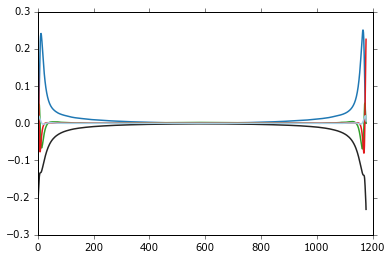

In [50]:
%matplotlib inline
import pylab as pl

pl.figure()
pl.plot(zp, tke_diss)
pl.plot(zp, tke_shear)
pl.plot(zp, tke_turb)
pl.plot(zp, tke_visc)
pl.plot(zp, tke_pres)

Publication quality figure:

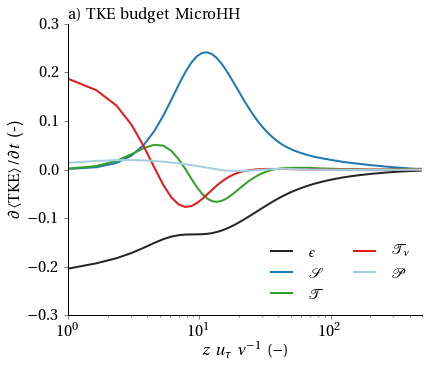

In [51]:
# Override some settings from the matplotlibrc configuration file:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{fourier}')
rc('font', size=17)
rc('legend', fontsize=15)

fig = pl.figure(figsize=(6, 5))
#                   L     B     R     T     ws    hs
fig.subplots_adjust(0.16, 0.13, 0.98, 0.94, 0.40, 0.20)
ax = pl.subplot(111)
pl.title(r'$\mathrm{a)~ TKE ~ budget ~ MicroHH}$', loc='left')
pl.semilogx(zp, tke_diss,  linewidth=2, label=r'$\epsilon$')
pl.semilogx(zp, tke_shear, linewidth=2, label=r'$\mathcal{S}$')
pl.semilogx(zp, tke_turb,  linewidth=2, label=r'$\mathcal{T}$')
pl.semilogx(zp, tke_visc,  linewidth=2, label=r'$\mathcal{T}_\nu$')
pl.semilogx(zp, tke_pres,  linewidth=2, label=r'$\mathcal{P}$')
pl.legend(frameon=False, loc=4, ncol=2)
pl.xlabel(r'$z \ u_\tau \ \nu^{-1} \ (-)$')
pl.ylabel(r'$\partial \left<\mathrm{TKE}\right>/\partial t$ (-)')
pl.xlim(1, 500)
# Remove top and right axis:
ax.spines['right'].set_visible(False)
ax.get_yaxis().tick_left()
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()

pl.savefig('figures/TKE_budget.pdf')

# 5 Documentation / getting help

### Online resources:
* Python: https://www.python.org/doc/
* Numpy: http://docs.scipy.org/doc/
* Matplotlib: http://matplotlib.org/contents.html

### Ipython help function:
Typing e.g. `np.zeros?` in IPython will give you basic documentation

### Getting help:
* Python-friends mailing list (before at ZMAW, now at LRZ)
* Stackoverflow (478034 Python related questions)